In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg  

# № 6.1 Решить линейную систему

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]], float)
B = np.array([12, 2, 1])  
Aobr = np.linalg.inv(A)
print (f'Обратная матрица:\n {Aobr}\n')
X = np.dot(Aobr, B)
print (f'Детерминант = {np.linalg.det(A):.2f}')
print (f'Вектор корней системы уравнений: {X}')

Обратная матрица:
 [[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]

Детерминант = 60.00
Вектор корней системы уравнений: [-9.2         0.9         6.46666667]


# 6.2 Найти псевдорешение

$x + 2y – z = 1$  

$3x – 4y = 7$

$8x – 5y + 2z = 12$

$2x – 5z = 7$

$11x +4y – 7z = 15$


In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]], float)
B = np.array([1, 7, 12, 7, 15])  
Ps_r = np.linalg.lstsq(A, B, rcond=None)
print (f'Псевдорешение:\n x~={Ps_r[0][0]:.2f}, y~={Ps_r[0][1]:.2f}, z~={Ps_r[0][2]:.2f}')
print (f'Значение суммы неувязки:{Ps_r[1][0]:.2f}')
print (f'Ранг матрицы:', Ps_r[2])

Псевдорешение:
 x~=1.14, y~=-0.90, z~=-0.90
Значение суммы неувязки:0.72
Ранг матрицы: 3


# 6.3 Сколько решений имеет линейная система:

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
print (f'Детерминант = {np.linalg.det(A):.2f}')
C = np.concatenate((A,B.T), axis=1)
print (f'Расширенная матрица:\n {C}')
print(f'Ранг исходной матрицы = {np.linalg.matrix_rank(A, 0.01)}, '
      f'Ранг расширенной матрицы = {np.linalg.matrix_rank(C, 0.01)}')


Детерминант = 0.00
Расширенная матрица:
 [[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
Ранг исходной матрицы = 2, Ранг расширенной матрицы = 3


Ранг исходной матрицы меньше ранга расширенной матрицы => система решений не имеет

In [5]:
A1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B1 = np.array([[7, 7, 7]])
B2 = np.array([7, 7, 7])

C1 = np.concatenate((A1, B1.T), axis=1)
print (f'Расширенная матрица:\n {C1}')
print (f'Ранг исходной матрицы = {np.linalg.matrix_rank(A1, 0.01)}, '
      f'Ранг расширенной матрицы = {np.linalg.matrix_rank(C1, 0.01)}')

Ms_r = (np.linalg.solve(A1, B2))
print (f'Решение:\n x1={Ms_r[0]}, x2={Ms_r[1]}, x3={Ms_r[2]}')

Proverka = np.dot(A1, Ms_r)
print (f'Проверяем правильность нахождения корней: {Proverka}')

Расширенная матрица:
 [[1 2 3 7]
 [4 5 6 7]
 [7 8 9 7]]
Ранг исходной матрицы = 2, Ранг расширенной матрицы = 2
Решение:
 x1=-19.0, x2=31.0, x3=-12.0
Проверяем правильность нахождения корней: [7. 7. 7.]


# 6.4 Вычислите LU-разложение матрицы:

In [6]:
A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)

print(f'Исходная матрица "A":\n {A}')
print(f'Определитель A = {np.linalg.det(A):.2f}')
print(f'Матрица "P":\n {P}')
print(f'Матрица "L":\n {L}')
print(f'Матрица "U":\n {U}')

B = [12, 56, 34]
print(f'Зададим вектор правых частей "B": {B}')

X = np.linalg.solve(A, B)
print (f'Решение: [{X[0]:.2f}, {X[1]:.2f}, {X[2]:.2f}]')

Исходная матрица "A":
 [[ 1  2  3]
 [ 2 16 21]
 [ 4 28 73]]
Определитель A = 432.00
Матрица "P":
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Матрица "L":
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
Матрица "U":
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
Зададим вектор правых частей "B": [12, 56, 34]
Решение: [7.60, 5.00, -1.87]


# 6.5  Найдите нормальное псевдорешение недоопределенной системы:


$x + 2y – z = 1$

$8x – 5y + 2z = 12$


Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 


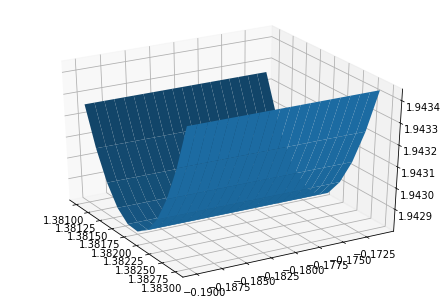

In [7]:
def Q(x, y, z):
  return (x**2 + y**2 + z**2)
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig, azim = - 30)
X = np.arange(1.381, 1.383, 0.0002)
Y = np.arange(-0.19, -0.17, 0.001)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Q(X, 10*X - 14, 21*X - 29))
show()

In [8]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
Ps_r = np.linalg.lstsq(A, B, rcond=-1)
print (f'Псевдорешение:\n x~={Ps_r[0][0]:.4f}, y~={Ps_r[0][1]:.4f}, z~={Ps_r[0][2]:.4f}')

Псевдорешение:
 x~=1.3819, y~=-0.1808, z~=0.0203


# 6. Найдите одно из псевдорешений вырожденной системы:

In [9]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
 
print(f'матрица "А":\n {A}')
print(f'матрица "Q":\n {Q}')
print(f'матрица "R": \n{R}')

# Зададим R1
R1 = R[:2, :2]
print (f'Выделенная матрица "R1":\n {R1}')
B1 = np.dot(np.transpose(Q), B)[:2]
print (f'Соответствующий "B1": [{B1[0]:.4f}, {B1[1]:.4f}]\n')
X1 = np.linalg.solve(R1, B1)
# print(X1)
X = np.append(X1, 0)
print (f'Псевдорешение системы: [{X[0]:.2f}, {X[1]:.2f}, {X[2]:.2f}]')
print (f'Норма "Х": {np.linalg.norm(X):.4f}')
print (f'Неувязка линейной системы: {np.linalg.norm(np.dot(A, X) - B):.4f}')



матрица "А":
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
матрица "Q":
 [[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
матрица "R": 
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]
Выделенная матрица "R1":
 [[-8.1240384  -9.6011363 ]
 [ 0.          0.90453403]]
Соответствующий "B1": [-12.1861, 0.0000]

Псевдорешение системы: [1.50, 0.00, 0.00]
Норма "Х": 1.5000
Неувязка линейной системы: 1.2247


Попробуйте также отыскать и нормальное псевдорешение.

In [10]:
X = np.linalg.lstsq(A, B, rcond=-1)[0]
print (f'Нормальное псевдорешение системы:{X}')
print (f'Норма "Х" для нормального псевдорешения: {np.linalg.norm(X):.4f}')
print (f'Неувязка линейной системы: {np.linalg.norm(np.dot(A, X) - B):.4f}')

Нормальное псевдорешение системы:[ 1.25  0.5  -0.25]
Норма "Х" для нормального псевдорешения: 1.3693
Неувязка линейной системы: 1.2247
